# Разведочный анализ данных: Data Visualization. Практическая работа

Сдаётся на проверку.

## Цель практической работы

Научиться работать с аномалиями в данных, строить визуализации, а также выявлять зависимости между переменными с помощью библиотеки Matplotlib.

## Что входит в практическую работу

1. Загрузить датасет и ознакомиться с ним.
2. Исследовать данные на аномальные значения и скорректировать выбросы.
3. Построить графики для количественных переменных.
4. Построить графики для категориальных переменных.
5. Исследовать зависимости в данных. 

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите знакомиться с визуализацией данных и выявлением аномалий при помощи `matplotlib`, а также выявлением зависимостей в данных.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [1]:
# Импортируйте необходимые библиотеки
import pandas as pd #import the required libraries
import matplotlib.pyplot as plt

### Задача 1. Выявление аномалий в стоимости автомобиля

1. Загрузите датасет из `data/vehicles_dataset_upd.csv` и выведите первые 5 записей.


In [2]:
# Ваш код здесь
df = pd.read_csv('data/vehicles_dataset_upd.csv') #read the data from the dataset
df.head()                                         #and display the first 5 rows

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. Постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, цвет — `indigo`.
Не забудьте подписать название графика и оси.

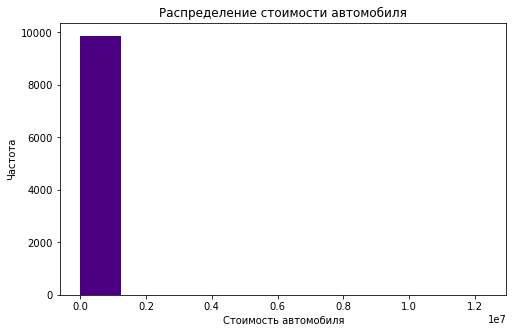

In [3]:
# Ваш код здесь
plt.figure(figsize=(8, 5))
plt.hist(df.price, color='indigo', bins=10)
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля');

3. График гистограммы в таком виде не дает представления о реальном распределении, но из него можно сделать вывод о наличии выбросов.
Постройте «ящик с усами» для стоимости автобомиля, настройте размер фигуры — 5x15, а также примените форматирование для отображения значений стоимости.
Не забудьте подписать название графика и оси.

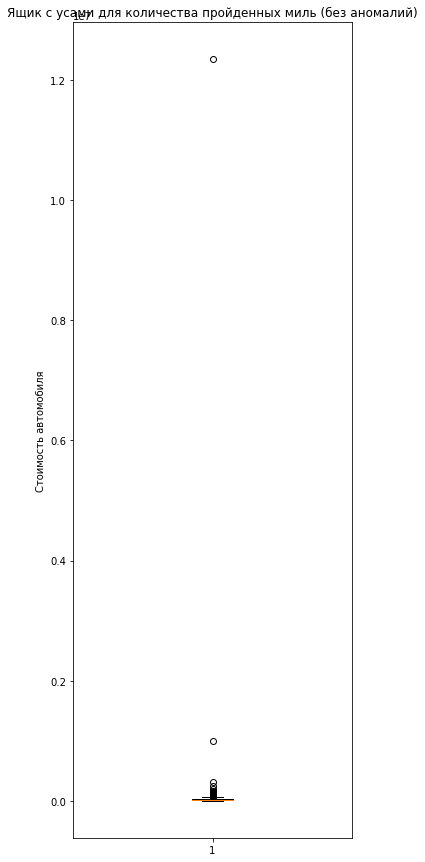

In [4]:
# Ваш код здесь
plt.figure(figsize=(5, 15))
plt.boxplot(df.price)
plt.ylabel('Стоимость автомобиля')
plt.title('Ящик с усами для количества пройденных миль (без аномалий)');

4. Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна.
Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью `apply(lambda x: f"{x:0.3f}")` отобразите значения в удобном для восприятия виде.

In [5]:
# Ваш код здесь
df.price.describe().apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

5. Выведете границы для нормальных значений стоимости автомобиля, используя интерквартильный размах. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [6]:
# Ваш код здесь
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [7]:
boundaries = calculate_outliers(df.price)
boundaries

(-22485.0, 58275.0)

6. Посчитайте и выведете количество выбросов в стоимости автомобиля. 

In [8]:
# Ваш код здесь
is_outlier = (df.price < boundaries[0]) | (df.price > boundaries[1]) 
is_outlier

0       False
1       False
2       False
3       False
4       False
        ...  
9863    False
9864    False
9865    False
9866    False
9867    False
Name: price, Length: 9868, dtype: bool

In [9]:

is_outlier.sum() / len(df)*100
print(' Всего выбросов в датафрейме -', is_outlier.sum(),'\n',
     'Что составляет -', round(is_outlier.sum() / len(df)*100, 2), '%')

 Всего выбросов в датафрейме - 207 
 Что составляет - 2.1 %


7. Выведете записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости. Посмотрите на данные и подумайте, могут ли данные выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.

In [10]:
# Ваш код здесь
df_is_outlier_sorted = df[is_outlier].sort_values(by='price', ascending=True)

In [11]:
#Решил 7 вопрос так
df[is_outlier].sort_values(by='price', ascending=True)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
934,7312212565,https://lasvegas.craigslist.org/cto/d/fresno-d...,las vegas,https://lasvegas.craigslist.org,58500,2013,ram,3500 limited,diesel,57149,clean,automatic,https://images.craigslist.org/00o0o_6VEbwgYoL0...,Only 57K Miles! This 3500 RAM Truck has the 6....,nv,36.746400,-119.639700,2021-04-24T20:46:06-0700,high,2021-04-25 03:46:06+00:00
5977,7310551940,https://cincinnati.craigslist.org/ctd/d/camp-d...,cincinnati,https://cincinnati.craigslist.org,58500,2019,chevrolet,"silverado 2500hd 4wd crew cab 153.7"" ltz",other,50930,clean,automatic,https://images.craigslist.org/01010_ldls5xr3zz...,***Call Us for more information at: 513-453-41...,oh,39.171991,-84.271999,2021-04-21T17:05:31-0400,high,2021-04-21 21:05:31+00:00
4783,7308933629,https://omaha.craigslist.org/cto/d/cortland-20...,omaha / council bluffs,https://omaha.craigslist.org,58500,2008,chevrolet,corvette,gas,11000,clean,manual,https://images.craigslist.org/00P0P_kxzGxZwBY9...,2008 Corvette Z06 Wil Cooksey Edition Car nu...,ia,40.445488,-96.713695,2021-04-18T15:53:04-0500,high,2021-04-18 20:53:04+00:00
8050,7307146509,https://lubbock.craigslist.org/ctd/d/brownfiel...,lubbock,https://lubbock.craigslist.org,58600,2019,ford,f-150,gas,29458,clean,automatic,https://images.craigslist.org/00E0E_6JF7CBAVf7...,Stanley CDJR Brownfield address: 1706 Lubbo...,tx,33.196047,-102.273565,2021-04-15T08:58:48-0500,high,2021-04-15 13:58:48+00:00
1253,7313450196,https://lasvegas.craigslist.org/ctd/d/salem-20...,las vegas,https://lasvegas.craigslist.org,58670,2016,chevrolet,other,other,16407,clean,automatic,https://images.craigslist.org/00000_e7iiMwUVq3...,2016 *** Chevrolet Corvette 2LZ Z06*** ...,nv,44.927304,-123.030322,2021-04-27T11:29:39-0700,high,2021-04-27 18:29:39+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,7315323093,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,197999,2015,other,Lamborghini Huracan,gas,33875,clean,other,https://images.craigslist.org/01717_55Ai9omMq5...,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.466088,-81.396429,2021-05-01T11:48:44-0400,high,2021-05-01 15:48:44+00:00
290,7310897583,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,239995,2017,ferrari,488 gtb,gas,6012,clean,automatic,https://images.craigslist.org/00t0t_dN5Wr8nfOx...,2017 Ferrari 488 GTB Coupe2017 Ferrari 488 GTB...,az,32.236075,-110.878886,2021-04-22T09:38:59-0700,high,2021-04-22 16:38:59+00:00
5585,7313998757,https://winchester.craigslist.org/ctd/d/manass...,winchester,https://winchester.craigslist.org,304995,2021,porsche,911,gas,22,clean,automatic,https://images.craigslist.org/00r0r_gh2TnrNdSu...,2021 PORSCHE 911 Turbo Offered by: Insider...,va,38.762669,-77.461754,2021-04-28T15:49:25-0400,high,2021-04-28 19:49:25+00:00
9663,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022,other,Any make any model,other,283995,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.572500,-75.595700,2021-04-11T13:51:42-0400,high,2021-04-11 17:51:42+00:00


8. Выведете последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.

In [12]:
# Ваш код здесь
df_is_outlier_sorted[-15:207]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
4073,7311841843,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,120000,2021,chevrolet,corvette c8 z51,gas,10,clean,automatic,https://images.craigslist.org/00z0z_99zXyVvNmm...,New arrival Z51 Call or text annamarie for d...,nm,35.081800,-106.648200,2021-04-24T08:38:45-0600,high,2021-04-24 14:38:45+00:00
1674,7303398175,https://pullman.craigslist.org/cto/d/pullman-6...,pullman / moscow,https://pullman.craigslist.org,123456,1995,other,cadvwrambuick,gas,283995,missing,other,https://images.craigslist.org/00i0i_5iBwIawLgG...,I have several cars to get rid of: A '65 Ramb...,id,46.735200,-117.172900,2021-04-07T15:57:23-0700,high,2021-04-07 22:57:23+00:00
9072,7308732637,https://evansville.craigslist.org/ctd/d/evansv...,evansville,https://evansville.craigslist.org,123456,2006,jeep,wrangler,gas,12345,clean,other,https://images.craigslist.org/00I0I_2IkqjY69Zq...,Very Nice TJ jeeps and a few LJ jeep wranglers...,in,38.025845,-87.596457,2021-04-18T09:55:42-0500,high,2021-04-18 14:55:42+00:00
2963,7308463617,https://jacksonville.craigslist.org/cto/d/pont...,jacksonville,https://jacksonville.craigslist.org,129000,2018,mercedes-benz,benz amg gt c,gas,4000,clean,automatic,https://images.craigslist.org/00C0C_bN8j4IcEqW...,Beautiful car in perfect condition. Very rare ...,fl,30.122300,-81.362700,2021-04-17T16:48:42-0400,high,2021-04-17 20:48:42+00:00
5076,7314445453,https://boston.craigslist.org/gbs/ctd/d/methue...,boston,https://boston.craigslist.org,129995,2007,ferrari,f430 spider,gas,12351,clean,manual,https://images.craigslist.org/00q0q_3DqREXHC0j...,2007 Ferrari F430 Spider 2dr Convertible O...,ma,42.756205,-71.210258,2021-04-29T14:45:08-0400,high,2021-04-29 18:45:08+00:00
6471,7312384300,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,129999,2018,mercedes-benz,maybach s560,gas,6000,clean,automatic,https://images.craigslist.org/00u0u_fKyDNpMeQR...,"Serious/ready buyers, please call or text @ (4...",fl,28.463700,-81.394800,2021-04-25T12:58:01-0400,high,2021-04-25 16:58:01+00:00
8904,7314817013,https://sandiego.craigslist.org/csd/ctd/d/dall...,san diego,https://sandiego.craigslist.org,139950,2017,other,Mclaren 570GT W/ Upgrades,gas,13000,clean,automatic,https://images.craigslist.org/00N0N_2egaCVi4pq...,SPECIALTYEXOTICS.COMCALL/TXT 469-215-1902FREE ...,ca,32.790400,-96.804400,2021-04-30T08:20:20-0700,high,2021-04-30 15:20:20+00:00
4183,7316319465,https://portland.craigslist.org/clc/ctd/d/glad...,portland,https://portland.craigslist.org,149990,2015,mercedes-benz,sprinter 3500 airs,diesel,49291,clean,automatic,https://images.craigslist.org/00B0B_79v5I132cL...,2015 Mercedes-Benz Sprinter 3500 Airstream Int...,or,45.382346,-122.605132,2021-05-03T11:04:09-0700,high,2021-05-03 18:04:09+00:00
8720,7313664504,https://austin.craigslist.org/cto/d/austin-sup...,austin,https://austin.craigslist.org,150000,2006,other,Peterbilt 378,diesel,1234,clean,manual,https://images.craigslist.org/00v0v_ejAvqrK3iP...,Selling a Wonderful Super Dump! 2006 Peterbilt...,tx,30.364900,-97.682700,2021-04-27T21:01:28-0500,high,2021-04-28 02:01:28+00:00
9042,7306718413,https://desmoines.craigslist.org/ctd/d/portlan...,des moines,https://desmoines.craigslist.org,163540,2020,mercedes-benz,other,other,6318,clean,automatic,https://images.craigslist.org/00y0y_i26NvL7pZC...,2020 *** Mercedes-Benz G-Class G63 AMG*** ...,ia,45.494265,-122.579192,2021-04-14T11:26:24-0500,high,2021-04-14 16:26:24+00:00


In [13]:
#Решил 8 вопрос так
df[is_outlier].sort_values(by='price', ascending=True).tail(15)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
4073,7311841843,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,120000,2021,chevrolet,corvette c8 z51,gas,10,clean,automatic,https://images.craigslist.org/00z0z_99zXyVvNmm...,New arrival Z51 Call or text annamarie for d...,nm,35.081800,-106.648200,2021-04-24T08:38:45-0600,high,2021-04-24 14:38:45+00:00
1674,7303398175,https://pullman.craigslist.org/cto/d/pullman-6...,pullman / moscow,https://pullman.craigslist.org,123456,1995,other,cadvwrambuick,gas,283995,missing,other,https://images.craigslist.org/00i0i_5iBwIawLgG...,I have several cars to get rid of: A '65 Ramb...,id,46.735200,-117.172900,2021-04-07T15:57:23-0700,high,2021-04-07 22:57:23+00:00
9072,7308732637,https://evansville.craigslist.org/ctd/d/evansv...,evansville,https://evansville.craigslist.org,123456,2006,jeep,wrangler,gas,12345,clean,other,https://images.craigslist.org/00I0I_2IkqjY69Zq...,Very Nice TJ jeeps and a few LJ jeep wranglers...,in,38.025845,-87.596457,2021-04-18T09:55:42-0500,high,2021-04-18 14:55:42+00:00
2963,7308463617,https://jacksonville.craigslist.org/cto/d/pont...,jacksonville,https://jacksonville.craigslist.org,129000,2018,mercedes-benz,benz amg gt c,gas,4000,clean,automatic,https://images.craigslist.org/00C0C_bN8j4IcEqW...,Beautiful car in perfect condition. Very rare ...,fl,30.122300,-81.362700,2021-04-17T16:48:42-0400,high,2021-04-17 20:48:42+00:00
5076,7314445453,https://boston.craigslist.org/gbs/ctd/d/methue...,boston,https://boston.craigslist.org,129995,2007,ferrari,f430 spider,gas,12351,clean,manual,https://images.craigslist.org/00q0q_3DqREXHC0j...,2007 Ferrari F430 Spider 2dr Convertible O...,ma,42.756205,-71.210258,2021-04-29T14:45:08-0400,high,2021-04-29 18:45:08+00:00
6471,7312384300,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,129999,2018,mercedes-benz,maybach s560,gas,6000,clean,automatic,https://images.craigslist.org/00u0u_fKyDNpMeQR...,"Serious/ready buyers, please call or text @ (4...",fl,28.463700,-81.394800,2021-04-25T12:58:01-0400,high,2021-04-25 16:58:01+00:00
8904,7314817013,https://sandiego.craigslist.org/csd/ctd/d/dall...,san diego,https://sandiego.craigslist.org,139950,2017,other,Mclaren 570GT W/ Upgrades,gas,13000,clean,automatic,https://images.craigslist.org/00N0N_2egaCVi4pq...,SPECIALTYEXOTICS.COMCALL/TXT 469-215-1902FREE ...,ca,32.790400,-96.804400,2021-04-30T08:20:20-0700,high,2021-04-30 15:20:20+00:00
4183,7316319465,https://portland.craigslist.org/clc/ctd/d/glad...,portland,https://portland.craigslist.org,149990,2015,mercedes-benz,sprinter 3500 airs,diesel,49291,clean,automatic,https://images.craigslist.org/00B0B_79v5I132cL...,2015 Mercedes-Benz Sprinter 3500 Airstream Int...,or,45.382346,-122.605132,2021-05-03T11:04:09-0700,high,2021-05-03 18:04:09+00:00
8720,7313664504,https://austin.craigslist.org/cto/d/austin-sup...,austin,https://austin.craigslist.org,150000,2006,other,Peterbilt 378,diesel,1234,clean,manual,https://images.craigslist.org/00v0v_ejAvqrK3iP...,Selling a Wonderful Super Dump! 2006 Peterbilt...,tx,30.364900,-97.682700,2021-04-27T21:01:28-0500,high,2021-04-28 02:01:28+00:00
9042,7306718413,https://desmoines.craigslist.org/ctd/d/portlan...,des moines,https://desmoines.craigslist.org,163540,2020,mercedes-benz,other,other,6318,clean,automatic,https://images.craigslist.org/00y0y_i26NvL7pZC...,2020 *** Mercedes-Benz G-Class G63 AMG*** ...,ia,45.494265,-122.579192,2021-04-14T11:26:24-0500,high,2021-04-14 16:26:24+00:00


9. Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалите все аномальные значения и сохраните датафрейм без аномалий в переменную `df_new`, выведете первые 5 значений.

*Подсказка*: обратите внимание на оператор "~" (тильда) при фильтрации исходного датафрейма. Это операция not, которая часто применяется для инвертирования логических значений. Советуем заглянуть в [документацию](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html), чтобы получить представление о его работе на примерах использования.

In [52]:
# Ваш код здесь 
df_new = df[(df['price'] < boundaries[1])]# | (df['price'] < boundaries[1])]

df_new

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,toyota,rav4,gas,150000,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,low,2021-04-10 20:33:57+00:00
9864,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,jeep,wrangler,gas,113573,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,medium,2021-05-03 13:36:30+00:00
9865,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,audi,a3 2.0t premium plus pzev,gas,150184,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low,2021-04-22 19:14:01+00:00
9866,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,porsche,cayenne,hybrid,61943,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high,2021-04-14 14:14:42+00:00


In [15]:
df_new = df[(df['price'] > boundaries[0]) & (df['price'] < boundaries[1])]

In [16]:
df_new.price.describe().apply(lambda x: f"{x:0.3f}")

count     9661.000
mean     18038.316
std      12525.953
min        500.000
25%       7500.000
50%      15000.000
75%      26994.000
max      57999.000
Name: price, dtype: object

In [17]:
df_new = df[~(df['price'] < boundaries[0]) ^ (df['price'] > boundaries[1])]

In [18]:
df_new.price.describe().apply(lambda x: f"{x:0.3f}")

count     9661.000
mean     18038.316
std      12525.953
min        500.000
25%       7500.000
50%      15000.000
75%      26994.000
max      57999.000
Name: price, dtype: object

### Задача 2. Исследование зависимости стоимости автомобиля от года производства

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год (воспользуейтесь группировкой по годам). Не забудьте переименовать колонки согласно их содержанию.


In [115]:
# Ваш код здесь
df_price_mean_per_year = df.groupby('year').price.mean().apply(lambda x: f"{x:0.2f}").to_frame(name='price_mean')
df_price_mean_per_year['year'] = df_price_mean_per_year.index
df_price_mean_per_year = df_price_mean_per_year.reindex(columns=['year', 'price_mean'])
df_price_mean_per_year.info() #при выполнении средние значения записались как строка
df_price_mean_per_year.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1995 to 2022
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        28 non-null     int64 
 1   price_mean  28 non-null     object
dtypes: int64(1), object(1)
memory usage: 672.0+ bytes


year           int64
price_mean    object
dtype: object

In [113]:
#переводим строку в число
df_price_mean_per_year.price_mean = pd.to_numeric(df_price_mean_per_year.price_mean)
df_price_mean_per_year.dtypes

year            int64
price_mean    float64
dtype: object

2. Постройте диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля. Не забудьте подписать название графика и оси.

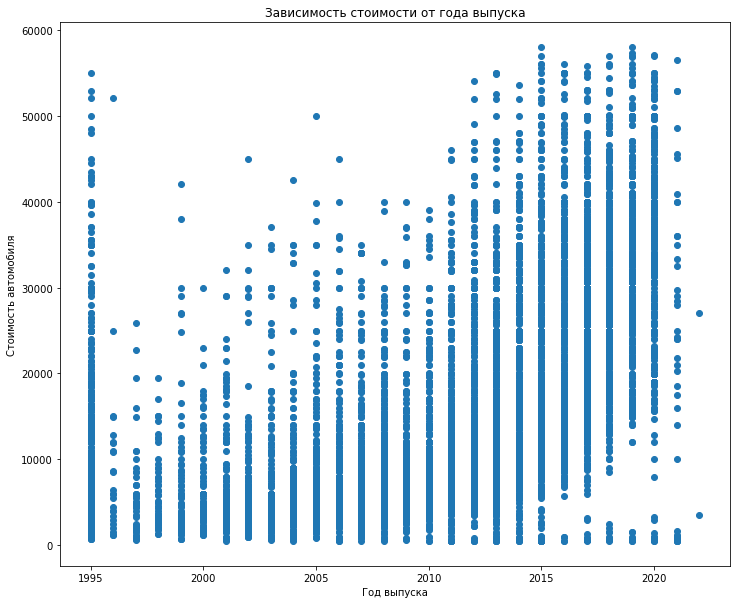

In [20]:
# Ваш код здесь
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x = df_new['year'], y = df_new['price'])
plt.xlabel("Год выпуска")
plt.ylabel("Стоимость автомобиля")
plt.title("Зависимость стоимости от года выпуска")
plt.show()


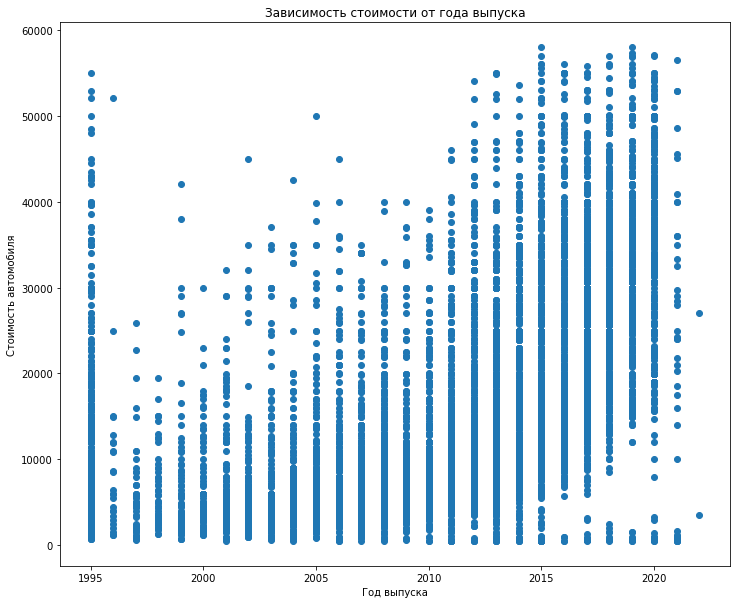

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x = df_new.year, y = df_new.price)
plt.xlabel("Год выпуска")
plt.ylabel("Стоимость автомобиля")
plt.title("Зависимость стоимости от года выпуска")
plt.show()

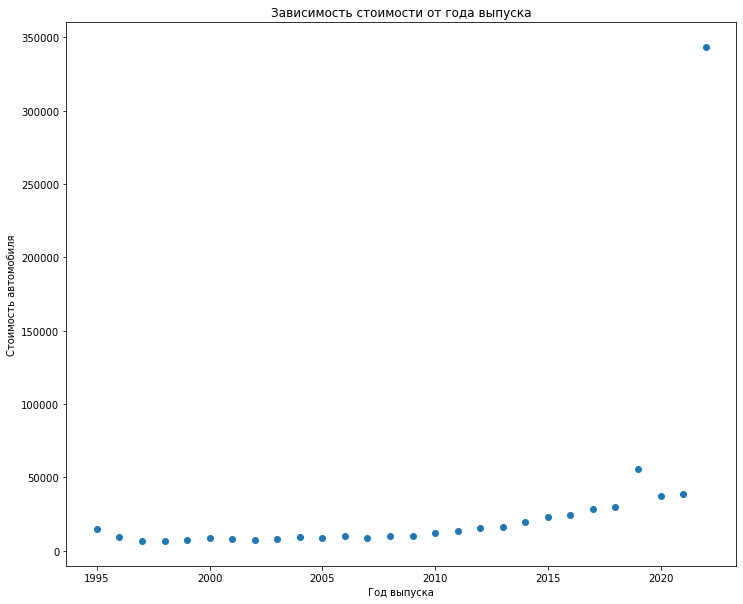

In [92]:

x = df_price_mean_per_year['year'].tolist()
y = df_price_mean_per_year['price_mean'].tolist()
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x, y)
plt.xlabel("Год выпуска")
plt.ylabel("Стоимость автомобиля")
plt.title("Зависимость стоимости от года выпуска")
plt.show()

3. Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили. Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведете количество автомобилей, произведенных в каждый год, воспользуейтесь группировкой по годам.

In [95]:
# Ваш код здесь
df_avto_per_year = df_new.groupby(['year'], as_index=False)[['id']].count()
df_avto_per_year = df_avto_per_year.rename(columns={'id': 'count'})
df_avto_per_year

,year,count
0,1995,419
1,1996,25
2,1997,44
3,1998,55
4,1999,81
5,2000,78
6,2001,122
7,2002,149
8,2003,185
9,2004,208


4. За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставьте в датафрейме автомобили, произведенные не позднее 2021 года, выведете первые пять значений датафрейма.

In [2]:
# Ваш код здесь
df_new_till_2021 = df_new[df_new['year'] < 2022]
df_new_till_2021.head()

NameError: name 'df_new' is not defined

5. На отфильтрованных данных повторите действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год. Не забудьте переименовать колонки согласно их содержанию.

In [96]:
# Ваш код здесь
df_price_mean_per_year_till_2021 = df_new_till_2021.groupby('year').price.mean().apply(lambda x: f"{x:0.2f}").to_frame(name='price_mean') 
df_price_mean_per_year_till_2021['year'] = df_price_mean_per_year_till_2021.index
df_price_mean_per_year_till_2021 = df_price_mean_per_year_till_2021.reindex(columns=['year', 'price_mean'])

df_price_mean_per_year_till_2021.price_mean = pd.to_numeric(df_price_mean_per_year_till_2021.price_mean)

6. Постройте линейный график ([plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) для визуализации зависимости стоимости от года выпуска автомобиля, настройте цвет линии —  `blue`, символ маркировки точек (`marker`) — ромб/алмаз — `D`, цвет точек (`markerfacecolor`) — `orange`. Используйте среднюю стоимость автомобиля, рассчитаную в предыдущем задании.
Не забудьте подписать название графика и оси.

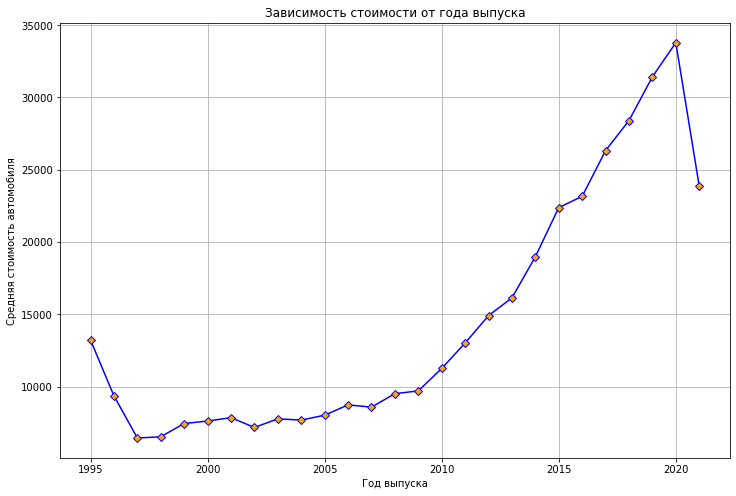

In [116]:
# Ваш код здесь

x = df_price_mean_per_year_till_2021.year
y = df_price_mean_per_year_till_2021.price_mean
plt.figure(figsize=(12, 8))
plt.plot(x, y, color = 'blue', marker = 'D', markerfacecolor = 'orange')
plt.xlabel("Год выпуска")
plt.ylabel("Средняя стоимость автомобиля")
plt.title("Зависимость стоимости от года выпуска")
plt.grid(True)
plt.show()

7. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля и года его производства. Ответьте на вопросы:


    1. Можно ли сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: Для того чтобы применить коэффициент Пирсона, изучаемый датафрейм был очищен от выбросов, так как этот коэффициент неустойчив к ним. Линейная связь между стоимостью автомобиля и годом его производства существует, так как коэффициент корреляции Пирсона не равен нулю и равен 0.85.

    2. Можно ли сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: Коффициент корреляции Пирсона равный 0.85 говорит о достаточно сильной корреляции, так как это число ближе к 1 чем к 0.

    3. Существующая связь является прямой или обратной? Почему?
    Ваш ответ: Данная связь между стоимостью автомобиля и годом его производства является прямой, так как 0.85 это положительное число.

In [3]:
# Ваш код здесь
df_price_mean_per_year_till_2021['year'].corr(df_price_mean_per_year_till_2021['price_mean'])


NameError: name 'df_price_mean_per_year_till_2021' is not defined

8. Для обновленных данных постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, параметры количества интервалов — 20, цвет — indigo. Не забудьте подписать название графика и оси.

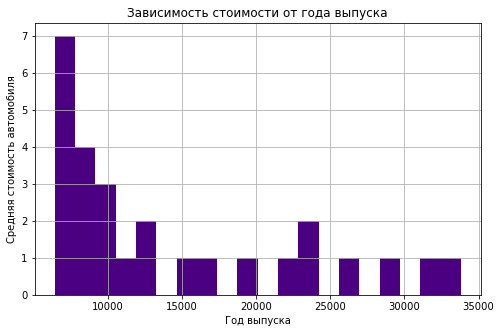

In [132]:
# Ваш код здесь
plt.figure(figsize=(8, 5))
plt.hist(df_price_mean_per_year_till_2021.price_mean, color = 'indigo', bins = 20)
plt.xlabel("Год выпуска")
plt.ylabel("Средняя стоимость автомобиля")
plt.title("Зависимость стоимости от года выпуска")
plt.grid(True)
plt.show()


9. Сохраните для дальнейшего использования датафрейм `df_new` в файл `data/vehicles_dataset_upd2.csv`, индексы не сохраняйте.

In [133]:
# Ваш код здесь
df_new.to_csv( 'data/vehicles_dataset_upd2.csv' , index = False )

### Задача 3. Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

1. На одном полотне постройте графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, параметры прозрачности — 0.7, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории. 

Подумайте, почему полученный график так выглядит?


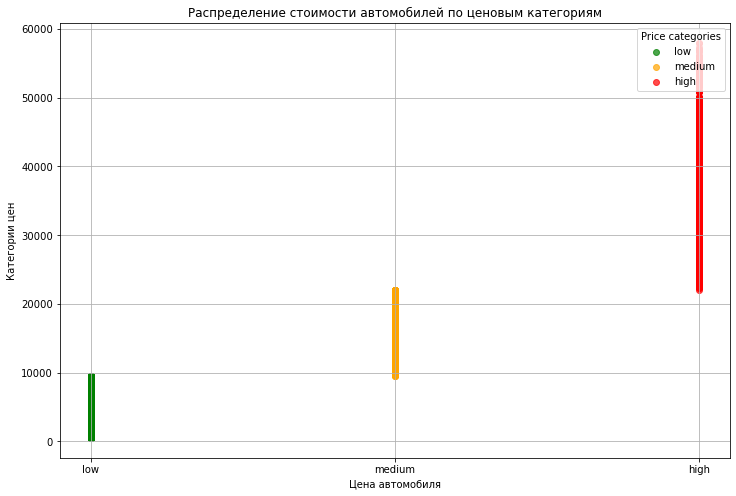

In [143]:


colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_new[df_new['price_category'] == price_category]

    ax.scatter(data['price_category'], data['price'], c=color, label=price_category, alpha=0.7)

ax.legend(loc='upper right', title="Price categories")
plt.title("Распределение стоимости автомобилей по ценовым категориям")
plt.xlabel('Цена автомобиля')
plt.ylabel('Категории цен')
plt.grid(True)
plt.show()

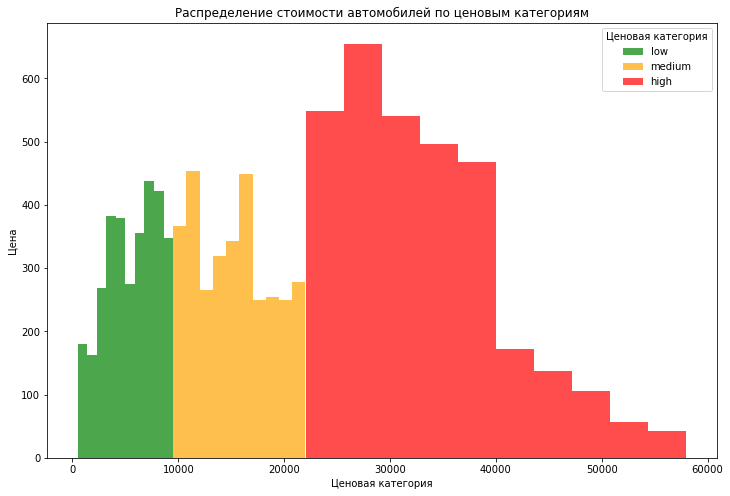

In [155]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'} #Colors of price_category

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_new[df_new['price_category'] == price_category]

    ax.hist(data['price'], color=color, alpha=0.7)
    
plt.ylabel('Цена')
plt.xlabel('Ценовая категория')
plt.title('Распределение стоимости автомобилей по ценовым категориям')
plt.legend(colors, title="Ценовая категория");

2. На одном полотне постройте диаграмму рассеяния для стоимости автомобиля и его года выпуска. Раскрасьте каждую точку (автомобиль) согласно ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории, расположив ее в нижнем правом углу. 

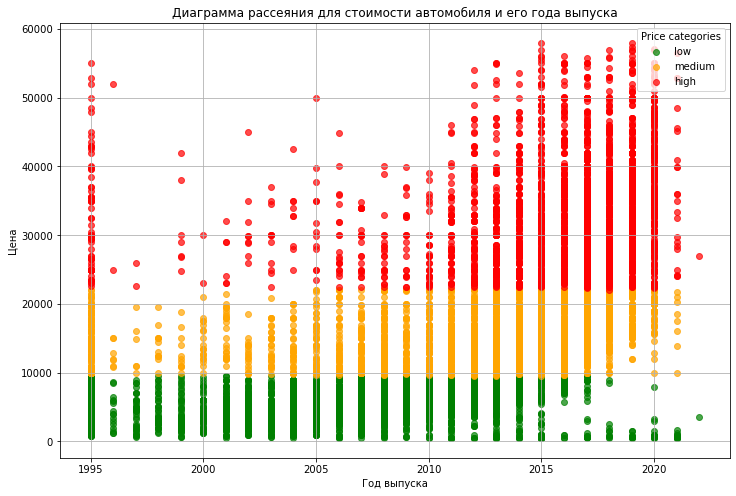

In [157]:
# Ваш код здесь
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_new[df_new['price_category'] == price_category]

    ax.scatter(data['year'], data['price'], c=color, label=price_category, alpha=0.7)

ax.legend(loc='upper right', title="Price categories")
plt.title("Диаграмма рассеяния для стоимости автомобиля и его года выпуска")
plt.xlabel('Год выпуска')
plt.ylabel('Цена')
plt.grid(True)
plt.show()

### Задача 4. Визуализация категориальных переменных

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.


In [240]:
# Ваш код здесь группирует df_new по 'manufacturer' и считает количество 'id' и переименовывает колонку  'id'
# as_index=False означает что 'manufacturer' не назначается индексом, 
# по умолчанию 'manufacturer' назначается индексом
# и сортировка в порядке убывания
df_manufacturer = df_new.groupby(['manufacturer'], 
                  as_index=False)[['id']].count().rename(columns={'id': 'count'}).sort_values(by='count',
                  ascending=False)



df_manufacturer


,manufacturer,count
12,ford,1564
6,chevrolet,1243
37,toyota,770
19,jeep,483
15,honda,460
28,nissan,452
32,ram,389
13,gmc,343
29,other,326
9,dodge,321


2. Постройте столбчатую диаграмму для производителей автомобиля, настройте размер фигуры — 20x10, ширину интервалов (`width`) — 0.9, цвета — чередующиеся `springgreen` и `dodgerblue`. Не забудьте подписать название графика и оси.
Для оси OX разверните подписи на 45 градусов, используя метод `xticks` и его параметр `rotation`.

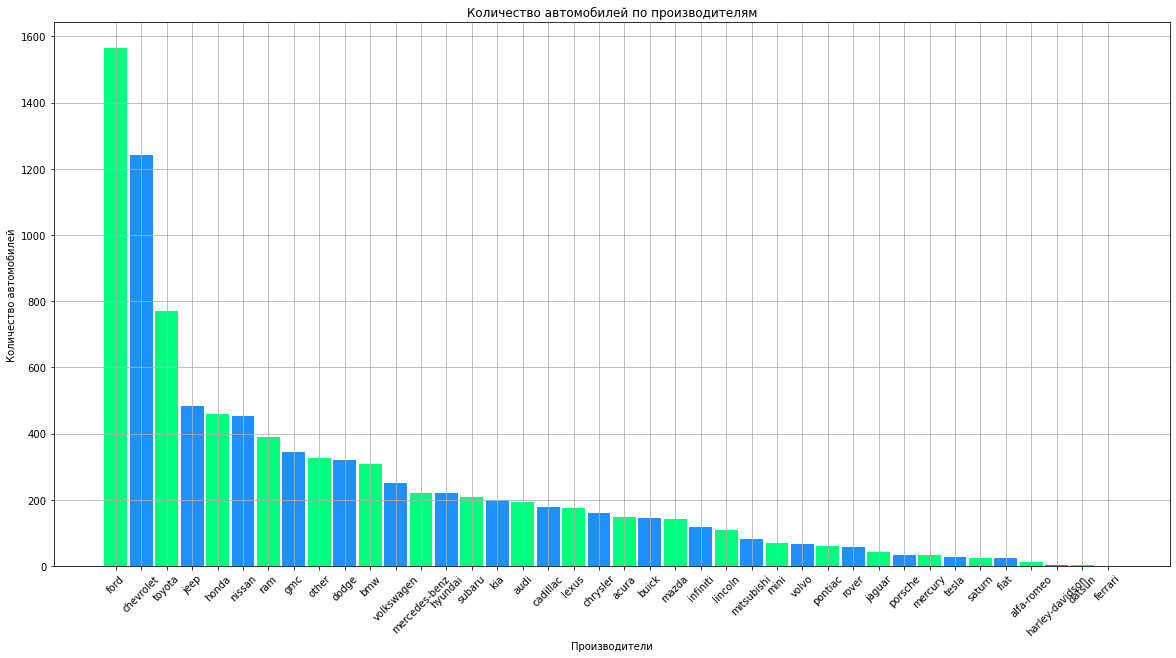

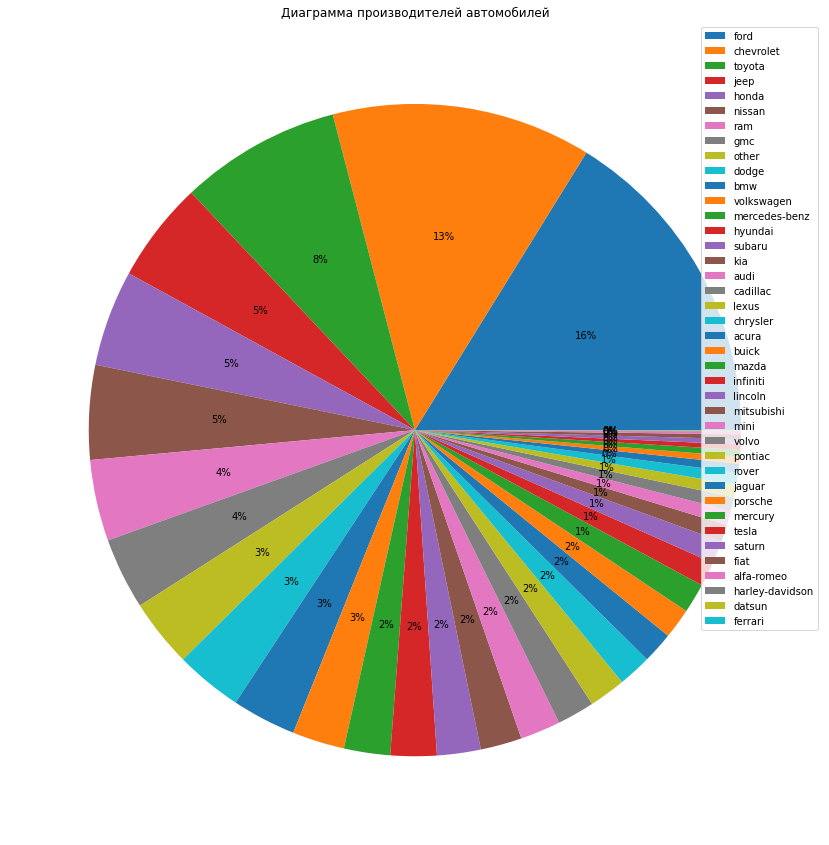

In [241]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.bar(df_manufacturer['manufacturer'], df_manufacturer['count'], 
        color=['springgreen', 'dodgerblue'], width = 0.9)
plt.grid(True)
plt.xlabel('Производители')
plt.ylabel('Количество автомобилей')
plt.title('Количество автомобилей по производителям');
# Ваш код здесь
plt.figure(figsize=(15, 15))
plt.pie(df_manufacturer['count'], labels=df_manufacturer['manufacturer'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Диаграмма производителей автомобилей")
plt.legend(loc = 'upper right')
plt.show();

3. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.

In [238]:
# Ваш код здесь
df_transmission = df_new.groupby(['transmission'], 
                  as_index=False)[['id']].count().rename(columns={'id': 'count'}).sort_values(by='count',
                  ascending=False)
df_transmission

,transmission,count
0,automatic,7400
2,other,1649
1,manual,612


4. Постройте круговую диаграмму для коробки передач автомобиля, настройте размер фигуры — 12x8, формат подписи о соотношении категорий, расстояние от метки о соотношении категорий до края сегмента. Не забудьте подписать название графика и оси, а также вывести легенду отдельно.


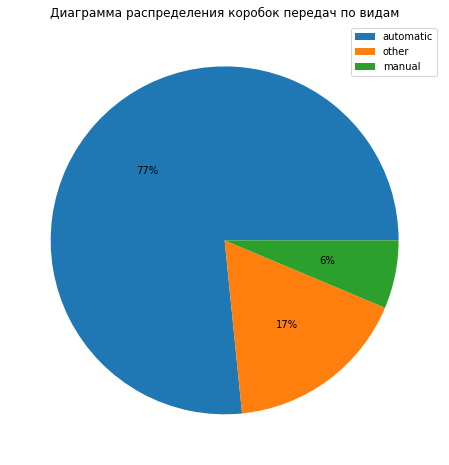

In [255]:
# Ваш код здесь
plt.figure(figsize=(12, 8))
plt.pie(df_transmission['count'], labels=df_transmission['transmission'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Диаграмма распределения коробок передач по видам")
plt.legend(loc = 'upper right')
plt.setp(autotexts, size=10, weight=700)
plt.show();